In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
df = pd.read_csv('dataset_sdn.csv')  # Update with the appropriate file path


In [ ]:
# Step 2: Preprocess the data if needed (e.g., removing stopwords, stemming, etc.)
df = df.drop(columns=['src', 'dst'],axis=1)

In [ ]:
dummies=pd.get_dummies(df['Protocol'])
df=pd.concat([df.drop('Protocol',axis=1),dummies],axis=1)

In [ ]:
df['rx_kbps']=df['rx_kbps'].fillna(df['rx_kbps'].median())
df['tot_kbps']=df['tot_kbps'].fillna(df['tot_kbps'].median())

In [ ]:
df.dtypes

dt               int64
switch           int64
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps        float64
tot_kbps       float64
label            int64
ICMP             uint8
TCP              uint8
UDP              uint8
dtype: object

In [ ]:
# Step 3: Split the dataset into features and labels
x = df.drop(columns=["label"])
y = df["label"]

In [ ]:
negative_count = (df < 0).sum(axis=0)
print(negative_count)


dt               0
switch           0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow     188
byteperflow    188
pktrate        188
Pairflow         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps          0
tot_kbps         0
label            0
ICMP             0
TCP              0
UDP              0
dtype: int64


In [ ]:
# to make all values in df as positive
df = df.abs()

In [ ]:
negative_count = (df < 0).sum(axis=0)
print(negative_count)

dt             0
switch         0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
ICMP           0
TCP            0
UDP            0
dtype: int64


In [ ]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 5: Feature extraction
'''vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)'''

X_train = X_train.abs()
# Step 6: Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 7: Predict on the test set
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5673537871524449


In [ ]:
dataset = pd.read_csv('streamData.csv')
null_values = dataset.isnull().sum()

# Print the count of null values
print(null_values)

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64


In [ ]:
print(dataset['Protocol'].unique())

['UDP' 'ICMP' 'TCP']


In [ ]:
dummies=pd.get_dummies(dataset['Protocol'])
dataset=pd.concat([dataset.drop('Protocol',axis=1),dummies],axis=1)

In [ ]:
columns_to_drop = ['src', 'dst']

# Dropping the specified columns
dataset = dataset.drop(columns=columns_to_drop)

In [ ]:
# loading the datastream values one by one into ra for prediction and storing the values
l=list()
t=list()
for i in range(1,dataset.shape[0]):
  ra = dataset.iloc[i]
  l.append(ra.loc["label"])
  ra=ra.drop('label')
  y_pred=model.predict([ra])
  t.append(y_pred[0])
print(l)
print(t)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Multi

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Multi

In [ ]:
# using the predicted values, calculating the accuracy
c=0
a=0

for i in range(1,len(t)):
  if t[i]==l[i]:
    c=c+1
    if t[i]==1:
      a=a+1;
      # block protocol
print(a, "Bots found out of", len(l), "packets")
print(c)
print(len(l))
print("Accuracy is: ", c/len(l))

73 Bots found out of 243 packets
83
243
Accuracy is:  0.34156378600823045


AUC-ROC score: 0.46597035040431267


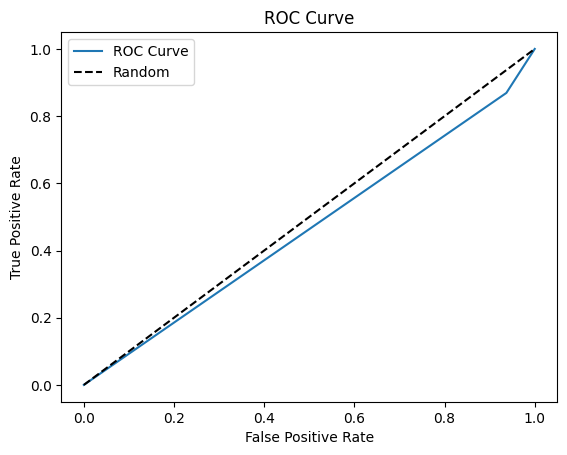

In [ ]:
# calculating auc roc score of the model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

auc_roc = roc_auc_score(l, t)
print("AUC-ROC score:", auc_roc)

# Assuming you have the true labels and predicted probabilities available
fpr, tpr, thresholds = roc_curve(l,t)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

[[ 10 149]
 [ 11  73]]


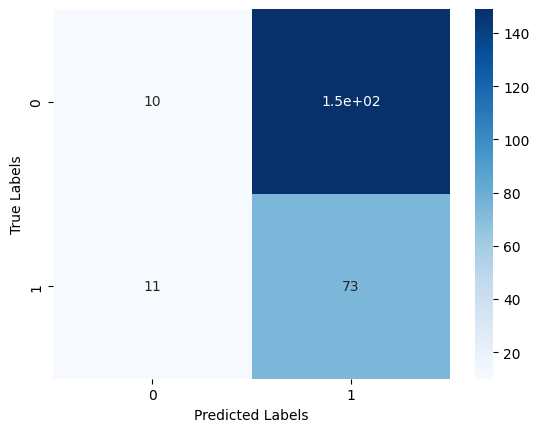

In [ ]:
# calculating the confusion matrix of the model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(l, t)
print(cm)

# Create a heatmap of the confusion matrix visual representation
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
